# TABLE OF CONTENTS
### 01. Importing Libraries
### 02. Importing Data
### 03. Exercise

# 01. Importing library

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [3]:
path = r'C:\Users\gabri\OneDrive\Desktop\CF Data Analysys Course\Data Analytics Immersion\A4 Achivement\Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_prior_products_merge_downcasted_derived_correted.pkl'))

# 03. Exercise

### Bar charts

<Axes: xlabel='orders_day_of_week'>

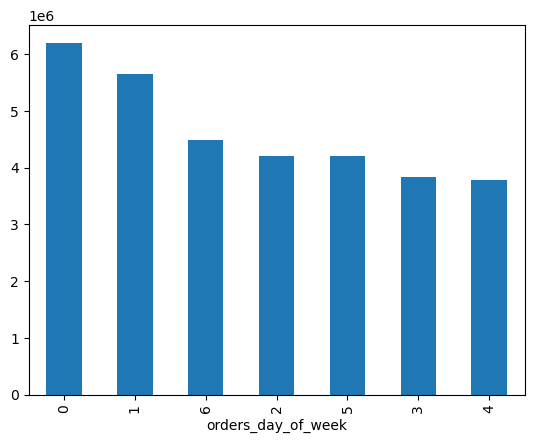

In [5]:
# creating bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

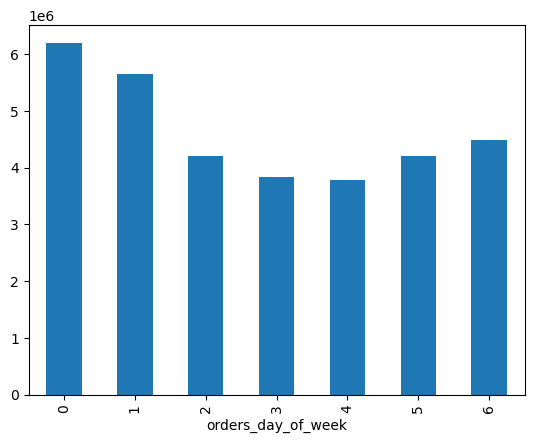

In [13]:
# creating bar chart with index
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

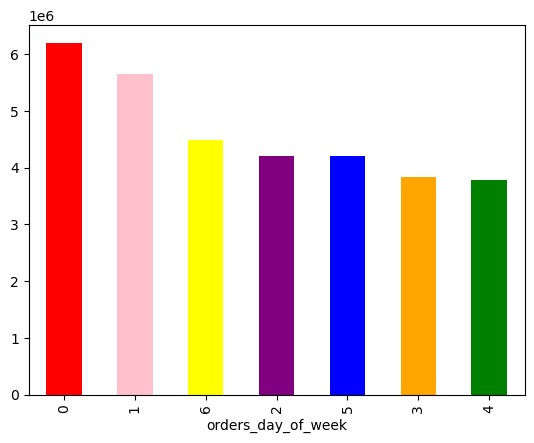

In [14]:
# creating bar chart with colors
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = {'purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'})

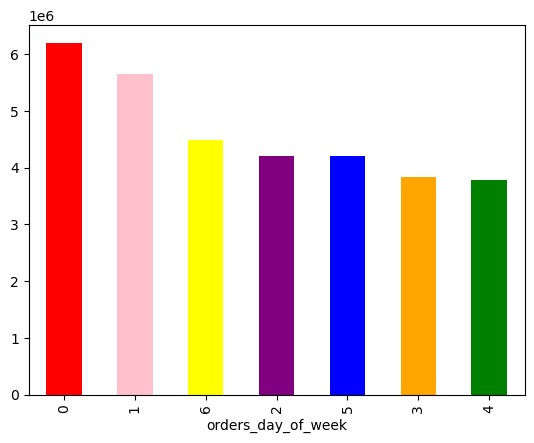

In [15]:
# calling the bart chart
bar.figure

In [16]:
# exporting the bar chart as .png file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


### Histograms

<Axes: ylabel='Frequency'>

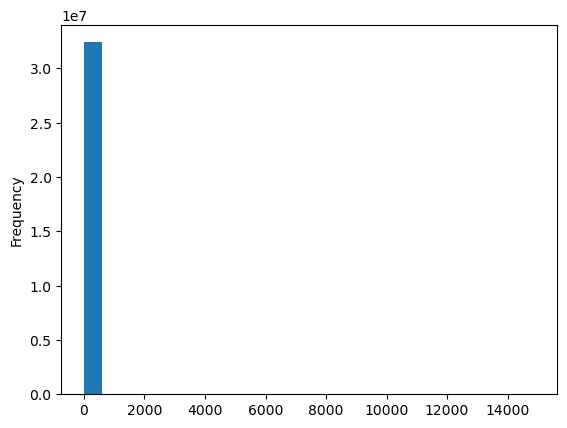

In [17]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [20]:
# consistency check - I already fixed the price of 9999 for 9.2
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     9.826447e+00
std      1.740960e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      1.490000e+04
Name: prices, dtype: float64

In [24]:
ords_prods_merge['prices'].mean()

np.float32(9.8264475)

In [23]:
ords_prods_merge['prices'].median()

7.400000095367432

In [25]:
ords_prods_merge['prices'].max()

14900.0

<Axes: xlabel='prices', ylabel='prices'>

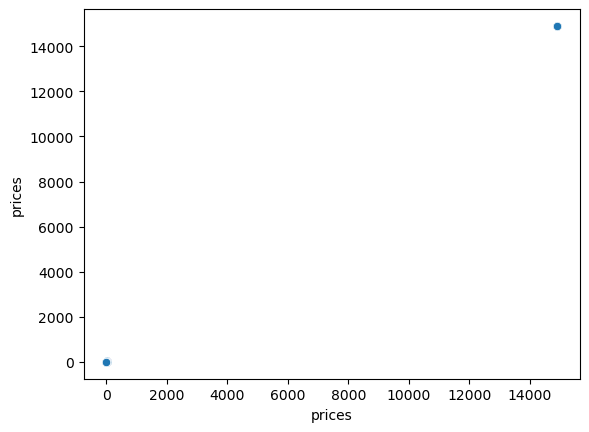

In [26]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [27]:
# checking for prices outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_periods_of_day
1576,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders
1638,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders
16522,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders
16528,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Average orders
53672,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Average orders
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Least busy,Fewest orders
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders


In [29]:
# substituting high prices for NaN (as missing)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [30]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

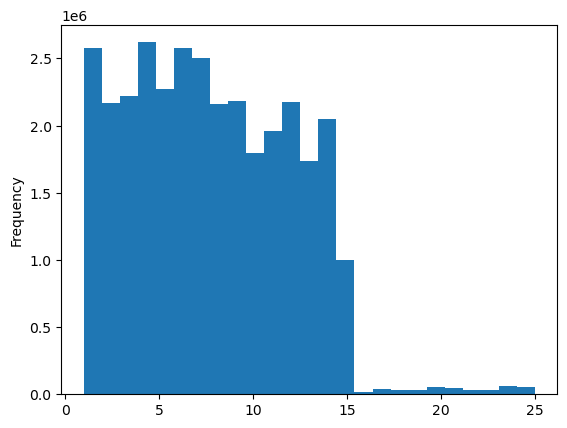

In [31]:
# plotting Histogram after price correction
ords_prods_merge['prices'].plot.hist(bins = 25)

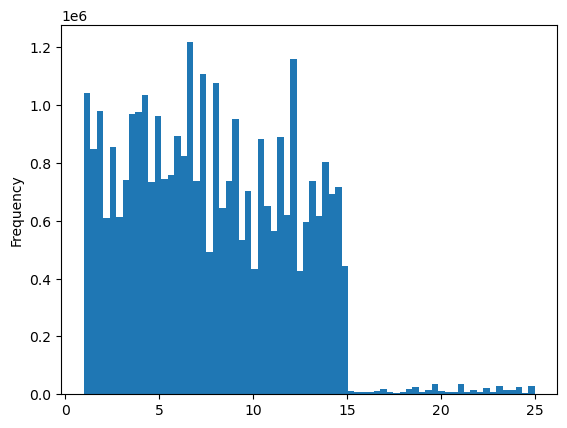

In [34]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [35]:
# exporting the histogram as .png file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

### Line Charts

In [37]:
# subsetting so I dont crash my computer
df = ords_prods_merge[:2000000]

#### Creating samples

In [38]:
# creating a 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [39]:
dev

array([False,  True, False, ...,  True,  True,  True], shape=(32404859,))

In [41]:
# checking floats assigned
np.random.rand(10)

array([0.0164016 , 0.99588525, 0.68895442, 0.9491469 , 0.63012328,
       0.9192488 , 0.87788077, 0.3936537 , 0.64745848, 0.73786691])

In [43]:
# storing 70% of the dataframe into new dataframe big
big = ords_prods_merge[dev]


In [44]:
# storing 30% of the dataframe in the dataframe small
small = ords_prods_merge[~dev]

In [45]:
# checking if it was corrected devided
len(ords_prods_merge)

32404859

In [46]:
len(big) + len(small)

32404859

In [47]:
# optmizing the dataframe by selecting only needed columns for plotting
df_2 = small[['orders_day_of_week','prices']]

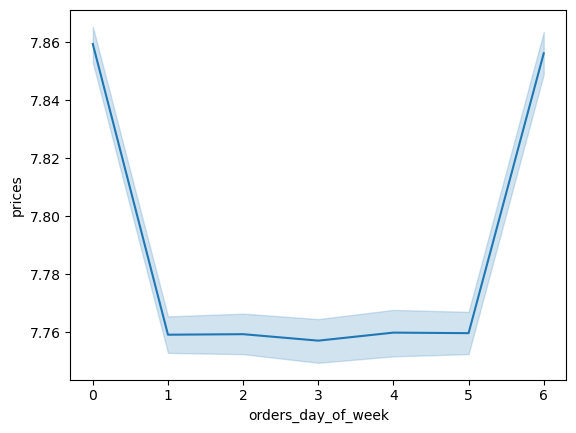

In [48]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [49]:
# exporting the line chart as .png file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_per_day_of_week.png'))